In [103]:
import pandas as pd
import os

In [105]:
data_dir = os.listdir('data/meta&data/')
exposure_routes_dict = {}

In [107]:
for file_ in data_dir:
    if file_.split('.')[0].split('_')[-1] == 'metadata':
        df = pd.read_csv(f'data/meta&data/{file_}')
        exp_route = df['Exposure Route'].values[0].lower()
        if exp_route not in exposure_routes_dict:
            exposure_routes_dict[exp_route] = [file_]
        else:
            exposure_routes_dict[exp_route].append(file_)        

In [108]:
exposure_routes_dict.keys()

dict_keys(['intraperitoneal', 'intranasal', 'intramuscular injection and intraperitoneal injection', 'oral (with eggnog)', 'oral', 'swimming for 5, 10 or 20 minutes', 'intradermal', 'inhalation', 'oral (in milk)', 'unknown type of injection', 'oral (liquid)', 'contact lens', 'intragastric', 'oral (no nahco3)', 'stomach tube', 'intubation', 'eyes-cornea', 'subcutaneous', 'injected in eyelids', 'intratracheal inoculation'])

In [109]:
oral_exp_route = []
for key in exposure_routes_dict.keys():
    if 'oral' in key.split(' '):
        for f in exposure_routes_dict[key]:
            oral_exp_route.append(f)

In [110]:
oral_exp_route

['233_metadata.csv',
 '232_metadata.csv',
 '238_metadata.csv',
 '232, 233_metadata.csv',
 '240_metadata.csv',
 '274_metadata.csv',
 '275_metadata.csv',
 '108_metadata.csv',
 '235_metadata.csv',
 '139_metadata.csv',
 '181_metadata.csv',
 '68_metadata.csv',
 '62_metadata.csv',
 '70_metadata.csv',
 '71_metadata.csv',
 '63_metadata.csv',
 '125_metadata.csv',
 '141_metadata.csv',
 '45_metadata.csv',
 '140_metadata.csv',
 '112_metadata.csv',
 '256 (excluding the outliers of exp 112)_metadata.csv',
 '183_metadata.csv',
 '83_metadata.csv',
 '96, 100, 166_metadata.csv',
 '153, 157, 159, 214, 216, 217_metadata.csv',
 '82_metadata.csv',
 '82, 223_metadata.csv',
 '81, 215_metadata.csv',
 '154, 156, 158, 160, 219, 220, 221_metadata.csv',
 '39, 40_metadata.csv',
 '40_metadata.csv',
 '165_metadata.csv',
 '42_metadata.csv',
 '98_metadata.csv',
 '38, 42, 99, 165_metadata.csv',
 '43_metadata.csv',
 '38, 39, 40, 42, 99, 144_metadata.csv',
 '142, 143, 144, 145, 147, 151, 161, 162, 163, 164, 168, 169, 170,

In [130]:
data_exp = []
data_bp = []
for mdata in oral_exp_route:
    df = pd.read_csv(f'data/meta&data/{mdata}')
    df.drop([df.columns[0], df.columns[1]], axis=1, inplace=True)

    if len(df.columns) == 9:
        cols_exp = df.columns
        data_exp.append(df.values[0])
    else:
        cols_bp = df.columns
        data_bp.append(df.values[0])



In [131]:
df_exp = pd.DataFrame(data_exp, columns=cols_exp.to_list())
df_exp

,Experiment Id,Exposure Route,Agent Strain,Dose Units,Host,Best Fit Model,Response Type,k,LD50/ID50
0,274,oral,Aa strain,CFU,mice,exponential,death,1.330000e-07,5220000.0
1,275,oral,Aa strain,CFU,mice,exponential,death,1.330000e-07,5220000.0
2,235,oral,*Salmonella newport*,CFU,human,exponential,infection,3.970000e-06,174000.0
3,62,oral,"porcine, PE7-05i",PFU,pig,exponential,infection,3.740000e-03,185.0
4,63,oral,"porcine, PE7-05i",PFU,pig,exponential,infection,3.740000e-03,185.0
5,59,oral (liquid),"type 2,attenuated",TCID50,Chimpanzee,exponential,alimentary infection,7.180000e-08,9660000.0
6,56,oral (liquid),"type 2,attenuated",TCID50,Chimpanzee,exponential,alimentary infection,7.180000e-08,9660000.0


In [132]:
df_exp.to_csv('exposure_route/oral/oral_exp.csv')

In [133]:
df_bp = pd.DataFrame(data_bp, columns=cols_bp)
df_bp

,Experiment Id,Exposure Route,Agent Strain,Dose Units,Host,Best Fit Model,Response Type,a,LD50/ID50,N50
0,233,oral (with eggnog),strain II,CFU,human,beta-Poisson,positive stool culture,0.23000,4.910000e+03,4.910000e+03
1,232,oral (with eggnog),strain II,CFU,human,beta-Poisson,positive stool culture,0.23000,4.910000e+03,4.910000e+03
2,238,oral (with eggnog),strain III,CFU,human,beta-Poisson,infection,0.88500,5.240000e+05,5.240000e+05
3,"232, 233",oral (with eggnog),strain II,CFU,human,beta-Poisson,positive stool culture,0.23000,4.910000e+03,4.910000e+03
4,240,oral (with eggnog),strain III,CFU,human,beta-Poisson,infection,0.88500,5.240000e+05,5.240000e+05
5,108,oral,Moredun isolate,oocysts,human,beta-Poisson,infection,0.11400,4.550000e+02,4.550000e+02
6,139,oral,Moredun isolate,oocysts,human,beta-Poisson,infection,0.11400,4.550000e+02,4.550000e+02
7,181,oral,Moredun isolate,oocysts,human,beta-Poisson,infection,0.11400,4.550000e+02,4.550000e+02
8,68,oral,NaN,FFU,human,beta-Poisson,NaN,0.02530,6.170000e+00,6.170000e+00
9,70,oral,NaN,FFU,human,beta-Poisson,NaN,0.02530,6.170000e+00,6.170000e+00


In [134]:
df_bp.to_csv('exposure_route/oral/oral_bp.csv')

In [118]:
exposure_routes_dict.keys()

dict_keys(['intraperitoneal', 'intranasal', 'intramuscular injection and intraperitoneal injection', 'oral (with eggnog)', 'oral', 'swimming for 5, 10 or 20 minutes', 'intradermal', 'inhalation', 'oral (in milk)', 'unknown type of injection', 'oral (liquid)', 'contact lens', 'intragastric', 'oral (no nahco3)', 'stomach tube', 'intubation', 'eyes-cornea', 'subcutaneous', 'injected in eyelids', 'intratracheal inoculation'])

9
['Acanth_Intranasal_Pooled' 'intranasal'
 'A. castellanii HN-3 and A culbertsoni A1' 'no of trophozoites' 'mice'
 'beta-Poisson' 'death' 0.245 19357.0]
9
[261 'intranasal' 'MHV-1' 'PFU' 'A/J mice' 'exponential' 'death' 0.00214
 324.0]
9
[3 'intraperitoneal' 'CO92' 'CFU' 'mice' 'exponential' 'death' 0.0345 20.1]


OSError: Cannot save file into a non-existent directory: 'exposure_route/intraperitoneal'

In [138]:
#intranasal = exposure_routes_dict['intranasal']
for route in exposure_routes_dict.keys():
    if 'oral' not in route.split(' ')[0]:
        exp_route_collector(exposure_routes_dict[route], route)

Wierd df found
Acanth_Cornea1_metadata.csv
Wierd df found
Acanth_Cornea2_metadata.csv


In [137]:
def exp_route_collector(data, exposure):
    data_bp = []
    data_exp = []
    for f in data:
        df = pd.read_csv(f'data/meta&data/{f}')
        df.drop([df.columns[0], df.columns[1]], axis=1, inplace=True)
        if len(df.columns) == 10:
            data_bp.append(df.values[0])
            cols_bp = df.columns
        elif len(df.columns) == 9:
            data_exp.append(df.values[0])
            cols_exp = df.columns        
        else:
            print('Wierd df found')
            print(f)
    if not os.path.exists(f'exposure_route/{exposure}'):
            os.makedirs(f'exposure_route/{exposure}')
    if len(data_exp) > 0:
        df_exp = pd.DataFrame(data_exp, columns=cols_exp.to_list())
        
        df_exp.to_csv(f'exposure_route/{exposure}/{exposure}_exp.csv')
    if len(data_bp) > 0:
        df_bp = pd.DataFrame(data_bp, columns=cols_bp)
        df_bp.to_csv(f'exposure_route/{exposure}/{exposure}_bp.csv')




In [139]:
df_oral_bp = pd.read_csv('exposure_route/oral/oral_bp.csv')


In [142]:
df_oral_bp_cfu = df_oral_exp[df_oral_exp['Dose Units'] == 'CFU']
df_oral_bp_cfu

,Unnamed: 0,Experiment Id,Exposure Route,Agent Strain,Dose Units,Host,Best Fit Model,Response Type,a,LD50/ID50,N50
0,0,233,oral (with eggnog),strain II,CFU,human,beta-Poisson,positive stool culture,0.23000,4.910000e+03,4.910000e+03
1,1,232,oral (with eggnog),strain II,CFU,human,beta-Poisson,positive stool culture,0.23000,4.910000e+03,4.910000e+03
2,2,238,oral (with eggnog),strain III,CFU,human,beta-Poisson,infection,0.88500,5.240000e+05,5.240000e+05
3,3,"232, 233",oral (with eggnog),strain II,CFU,human,beta-Poisson,positive stool culture,0.23000,4.910000e+03,4.910000e+03
4,4,240,oral (with eggnog),strain III,CFU,human,beta-Poisson,infection,0.88500,5.240000e+05,5.240000e+05
18,18,83,oral (in milk),2a (strain 2457T),CFU,human,beta-Poisson,positive stool isolation,0.26500,1.480000e+03,1.480000e+03
19,19,"96, 100, 166",oral (in milk),EIEC 1624,CFU,human,beta-Poisson,positive stool isolation,0.15500,2.110000e+06,2.110000e+06
20,20,"153, 157, 159, 214, 216, 217",oral (in milk),EIEC 1624,CFU,human,beta-Poisson,positive stool isolation,0.15500,2.110000e+06,2.110000e+06
21,21,82,oral (in milk),2a (strain 2457T),CFU,human,beta-Poisson,positive stool isolation,0.26500,1.480000e+03,1.480000e+03
22,22,"82, 223",oral (in milk),2a (strain 2457T),CFU,human,beta-Poisson,positive stool isolation,0.26500,1.480000e+03,1.480000e+03


<Axes: >

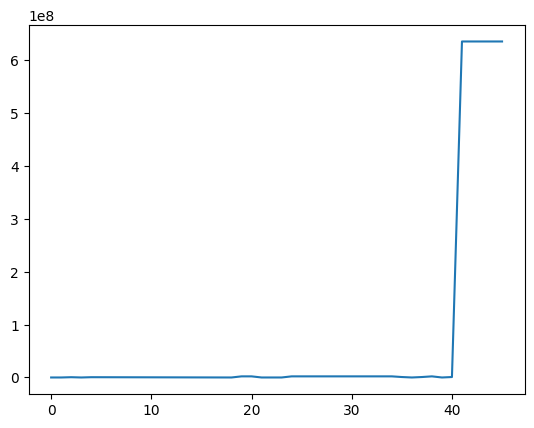

In [155]:
import matplotlib.pyplot as plt

df_oral_bp_cfu['N50'].plot()

In [144]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.0/155.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.3 MB/s eta 0:00:00


In [158]:
data_dir = os.listdir('data/meta&data/')

responses = {}
for f in data_dir:
    df = pd.read_csv(f'data/meta&data/{f}')
    if 'metadata' not in f:
        if df.columns[2] in responses:
            responses[df.columns[2]] += 1
        else:
            responses[df.columns[2]] = 1
        if df.columns[3] in responses:
            responses[df.columns[3]] += 1
        else:
            responses[df.columns[3]] = 1
print(responses)

{'Mild to severe diarrhea': 5, 'No mild to severe diarrhea': 5, 'Corneal Ulceration': 2, 'Not Corneal Ulceration': 3, 'Dead': 40, 'Survived': 40, 'Infected': 31, 'Non-infected': 32, 'Diarrhea': 5, 'No diarrhea': 4, 'Illness': 5, 'Not illness': 5, 'Cholera diarrhea': 1, 'No cholera diarrhea': 1, 'Positive stool isolation': 3, 'No positive stool isolation': 3, 'INFECTED': 2, 'NON-INFECTED': 2, 'Positive Response': 5, 'Negative Response': 5, 'infected': 4, 'INFECTION': 5, 'NOT': 5, 'DEATH': 3, 'NOT DEATH': 3, 'Positive Responses': 2, 'Negative Responses': 2, 'Infection (keratitis)': 1, 'Not Infection (keratitis)': 1, 'Disease': 3, 'No disease': 3, 'Not infected': 1, 'Shedding in feces': 1, 'No shedding in feces': 1, 'Detectable shedding': 1, 'No detectable shedding': 1, 'CLINICAL SIGNS': 1, 'NOT CLINICAL SIGNS': 1, 'Diarrhea and culture positive': 1, 'No diarrhea and culture positive': 1, 'MORBIDITY': 2, 'NOT MORBIDITY': 2, 'Positive stool culture': 3, 'No positive stool culture': 3, 'Sli

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [167]:
features = df_oral_bp_cfu[['a', 'LD50/ID50', 'N50']].dropna()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [168]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

In [169]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features_pca)
df_oral_bp_cfu['Cluster'] = clusters  # Assigning cluster labels to the original dataframe


/Users/matejamilicevic/anaconda3/envs/qmra/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/nb/x8ft0wb94sd72p6bpk_ld9fc0000gn/T/ipykernel_16497/2176479939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oral_bp_cfu['Cluster'] = clusters  # Assigning cluster labels to the original dataframe


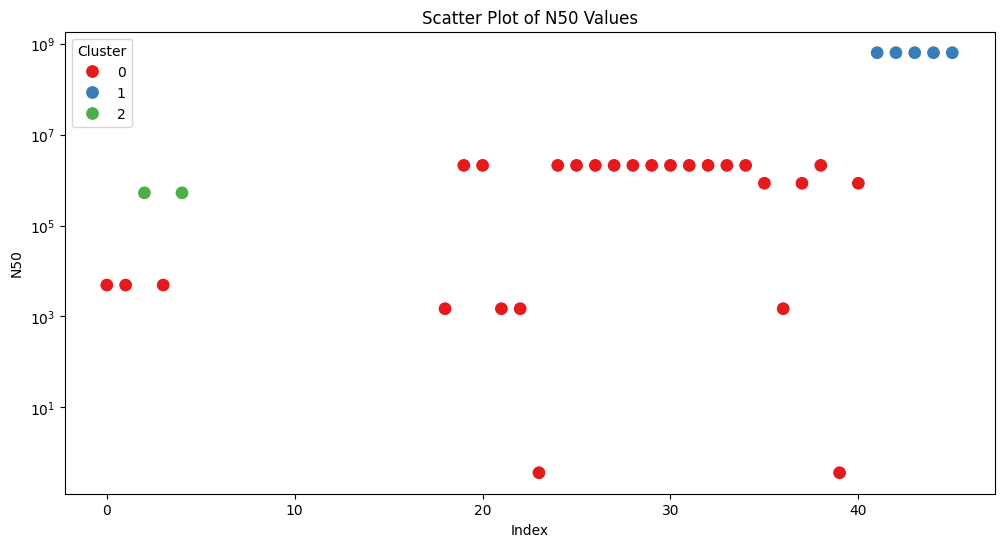

In [170]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_oral_bp_cfu, x=df_oral_bp_cfu.index, y='N50', hue='Cluster', palette='Set1', s=100)
plt.title('Scatter Plot of N50 Values')
plt.xlabel('Index')
plt.ylabel('N50')
plt.yscale('log')  
plt.legend(title='Cluster')
plt.show()

In [165]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 3.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 15.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 4.3 MB/s eta 0:00:0000:0100:01m
